# A4. Comparing Variables Graphically

-----

In [15]:
import pandas as pd
import seaborn as sns
import queryM248 as query

## 1. Connect to the database

-----

In [16]:
db = query.Database("sets")

## 2. Side-by-side bar chart

-----

1. Import the `Tattoo` table
2. Wrangle the data
    - add a `count` column
    - pivot the table
3. Plot the side-by-side bar chart

In [17]:
# connect to the db
db = query.Database("sets")

# query the table
table = query.Table("Tattoos", db)

# declare the DataFrame
df1 = table.toDF()

In [18]:
# add a count column
df1['count'] = df1.groupby(['Score', 'Depth'])['Score'].transform('count')

# pivot the table
table = pd.pivot_table(df1,
                       values='count',
                       index='Score',
                       columns='Depth')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Score by Depth')]

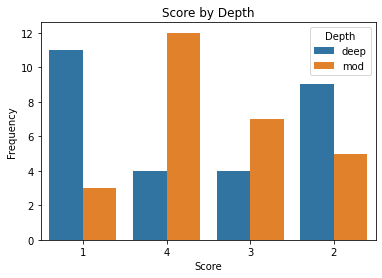

In [19]:
fig1 = sns.barplot(data=df1,
                   x='Score',
                   y='count',
                   hue="Depth")

fig1.set(ylabel='Frequency',
         title='Score by Depth')

## 2. Unit-area histogram

-----

1. Import the `Membership` table
2. Wrangle the data
    - cast `Percentage` to $float`
3. Plot the unit-area histogram
    - use `stat='density'`

In [20]:
# query the table; send to DataFrame
table = query.Table("Membership", db)
df2 = table.toDF()

In [21]:
# recast percentage to float
df2 = df2.astype({'Percentage': 'float'})

[Text(0.5, 1.0, 'Adult Membership of Sports Club by Percentage')]

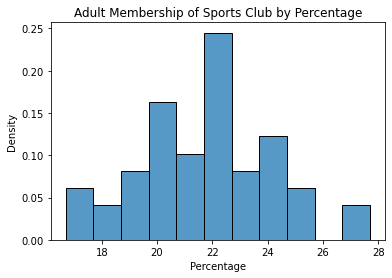

In [22]:
# plot the data
fig2 = sns.histplot(data=df2,
                    x='Percentage',
                    binwidth=1,
                    stat='density')

# Label fig
fig2.set(title="Adult Membership of Sports Club by Percentage")

## 3. Comparative boxplots

-----

1. Import the `Memory` table
2. Wrangle the data
    - check dtypes, recast if needed
3. Plot the unit-area histogram
    - use `pd.melt()` to merge columns

In [23]:
# define the path to the dataset
table = query.Table('Memory', db)
df3 = table.toDF()

In [24]:
df3.dtypes

Pleasant      object
Unpleasant    object
dtype: object

In [25]:
# recast both fields to float
df3 = df3.astype({'Pleasant': 'float', 'Unpleasant': 'float'})
df3.dtypes

Pleasant      float64
Unpleasant    float64
dtype: object

[Text(0.5, 0, 'Time (s)'),
 Text(0, 0.5, 'Memory Type'),
 Text(0.5, 1.0, 'Recall Time by Memory Type')]

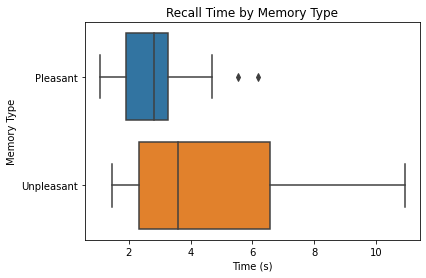

In [26]:
# plot the data
# pd.melt() combines the two felds 'Pleasant' and 'Unpleasant'
ax3 = sns.boxplot(data=pd.melt(df3),
                  y='variable',
                  x='value')

ax3.set(xlabel="Time (s)",
        ylabel="Memory Type",
        title="Recall Time by Memory Type")

## 4. Scatterplots

-----

1. Import the `Memory` table
2. Wrangle the data
    - check dtypes, recast if needed
3. Plot the scatterplot

In [29]:
table = query.Table("distance", db)
df4 = table.toDF()

In [30]:
df4.dtypes

Road    float64
Map     float64
dtype: object

[Text(0.5, 1.0, 'Road Distance Against Map Distance')]

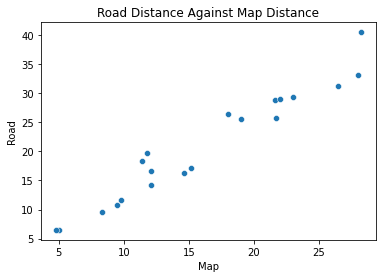

In [31]:
# plot the data
ax4 = sns.scatterplot(data=df4,
                      x="Map",
                      y="Road")

ax4.set(title='Road Distance Against Map Distance')